In [1]:
%matplotlib inline
import plot_helpers as ph
from plot_helpers import PlotDef, DataEntry

In [2]:

adult_datafiles = [
    ('../results/parity_min_max/adult_race_numerical-binsensitive.csv', 'Adult (race)'),
    ('../results/parity_min_max/adult_sex_numerical-binsensitive.csv', 'Adult (sex)'),
]

In [3]:
def label_change(label):
    parts = label.split('_')
    mode = parts[-1]
    # in_True = parts[4] == "True"
    # optional_star = "*" if in_True else ""
    # return f"FairGPparity{optional_star}, {num}", in_True
    return "average" if mode == "True" else mode, True

def filter_algos(label):
    return "True" in label

data = ph.parse_all(adult_datafiles, filter_algos, label_change)

In [4]:
# reorder the entries
for i, d in enumerate(data):
    data[i] = d._replace(entries=d.entries[2:3] + d.entries[0:2])

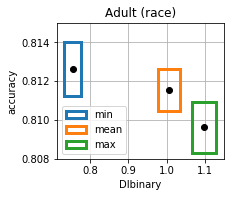

In [12]:
xaxis = ('DIbinary', 'DIbinary')
yaxis = ('accuracy', 'accuracy')
fig, plots = ph.errorbox(data[:1], xaxis, yaxis, figsize=(2.7,2.5))
plots[0, 0].set_ylim(0.808, 0.815)
fig.savefig('dempar_vary_beta.eps', bbox_inches='tight')